In [75]:
import numpy as np
import random
import gudhi as gd
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import sys
sys.path.append('code')
import dmtsignal as dmt
import dmtvisual as dmtvis
import importlib
import warnings
warnings.filterwarnings("ignore")
dmt = importlib.reload(dmt)
dmtvis = importlib.reload(dmtvis)

In [78]:
#X=dmt.extract_simplices(st)
X=np.load("./data/X.npy",allow_pickle=True)
points=np.load("./data/points.npy",allow_pickle=True)
kX=dmt.build_boundaries(X)
s1=np.array(dmtvis.height_function(X,points))
#s1=np.load("./data/random_signal.npy",allow_pickle=True)
#s1=np.array(dmtvis.dist_center_function(X,points))


[0.0057809641226661546, 0.9829323903764209]


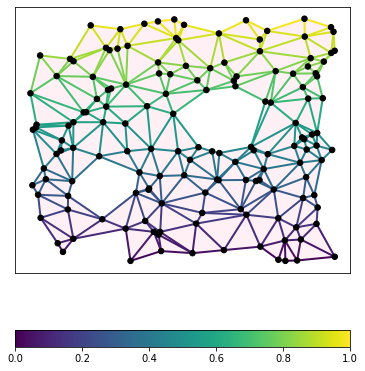

In [79]:
s0 = ['black']*len(X[0])#np.zeros(len(simplices[0]))
s2 =np.random.uniform(size=len(X[2]))
fig = plt.figure(figsize=(6,7))
ax = fig.add_subplot(111)
dmtvis.plot_nodes(s0, points,ax, zorder=3,s=30)
dmtvis.plot_edges(s1.copy(),points,X, ax, zorder=2,linewidths=2)
dmtvis.plot_triangles_plain('lavenderblush',points,X, ax, zorder=1)
cbar=plt.colorbar(ax.collections[0], ax=ax,orientation="horizontal")
#cbar.set_ticklabels(np.arange(s1.max() ,s1.min(),6))
print([s1.min(),s1.max()])
ax.set_xticks([])
ax.set_yticks([])   
plt.savefig('./figures/ex_coll_1.pdf')
plt.show()

### Collapse all 2-cells

In [85]:
all_X,collapses,all_losses,total_loss,all_signals,phispsis= dmt.sequence_optimal_up_collapses(X=X,kX=kX,dimq=1,signal=s1,steps=120)
colX=all_X[-1]
colS=all_signals[-1]

[0.009071906103450211, 1.4862755556059564]


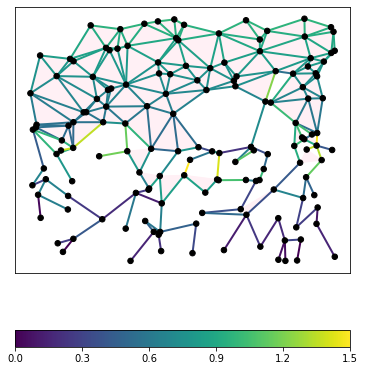

In [86]:
s0 = ['black']*len(X[0])#np.zeros(len(simplices[0]))
f_X=all_X[-1]
f_s=all_signals[-1]
fig = plt.figure(figsize=(6,7))
ax = fig.add_subplot(111)
dmtvis.plot_nodes(s0, points,ax, zorder=3,s=30)
dmtvis.plot_edges(f_s.copy(),points,f_X, ax, zorder=2,linewidths=2)
dmtvis.plot_triangles_plain('lavenderblush',points,f_X, ax, zorder=1)

cbar=plt.colorbar(ax.collections[0], ax=ax,orientation="horizontal")
cbar.set_ticklabels(np.around(np.append(np.arange(f_s.min(),f_s.max(),(f_s.max())/5),f_s.max()),decimals=1))
ax.set_xticks([])
ax.set_yticks([])   
print([f_s.min(),f_s.max()])
plt.savefig('./figures/ex_coll_2.pdf')
plt.show()

[0.0, 1.4862755556059564]


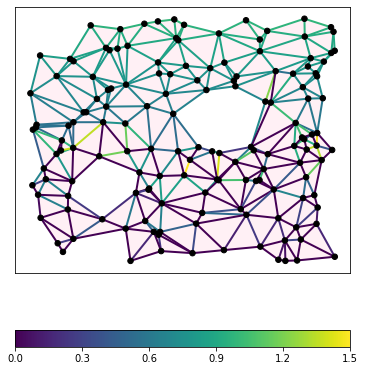

In [87]:
s0 = ['black']*len(X[0])#np.zeros(len(simplices[0]))
s2 =np.random.uniform(size=len(X[2]))
sr=phispsis
fig = plt.figure(figsize=(6,7))
ax = fig.add_subplot(111)
dmtvis.plot_nodes(s0, points,ax, zorder=3,s=30)
dmtvis.plot_edges(sr.copy(),points,X, ax, zorder=2,linewidths=2)
dmtvis.plot_triangles_plain('lavenderblush',points,X, ax, zorder=1)
cbar=plt.colorbar(ax.collections[0], ax=ax,orientation="horizontal")
cbar.set_ticklabels(np.around(np.append(np.arange(sr.min(),sr.max(),(sr.max())/5),sr.max()),decimals=1))

#cbar.set_ticklabels(np.arange(s1.max() ,s1.min(),6))
print([sr.min(),sr.max()])
ax.set_xticks([])
ax.set_yticks([]) 
plt.savefig('./figures/ex_coll_3.pdf')
plt.show()

[0.0, 1.0978804312635513]


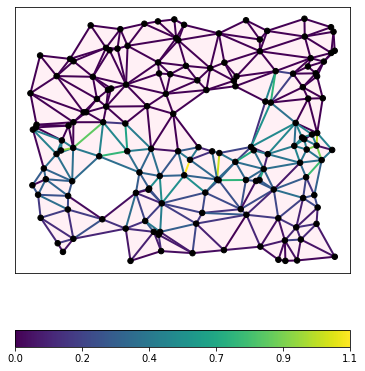

In [88]:
s0 = ['black']*len(X[0])#np.zeros(len(simplices[0]))
s2 =np.random.uniform(size=len(X[2]))
sl=np.abs(s1-phispsis)
fig = plt.figure(figsize=(6,7))
ax = fig.add_subplot(111)
dmtvis.plot_nodes(s0, points,ax, zorder=3,s=30)
dmtvis.plot_edges(sl.copy(),points,X, ax, zorder=2,linewidths=2)
dmtvis.plot_triangles_plain('lavenderblush',points,X, ax, zorder=1)
cbar=plt.colorbar(ax.collections[0], ax=ax,orientation="horizontal")
#cbar.set_ticklabels([])
a=np.around(np.append(np.arange(sl.min(),sl.max(),(sl.max())/5),sl.max()),decimals=1)
cbar.set_ticklabels(a)
print([sl.min(),sl.max()])
ax.set_xticks([])
ax.set_yticks([]) 
plt.savefig('./figures/ex_coll_4.pdf')
plt.show()

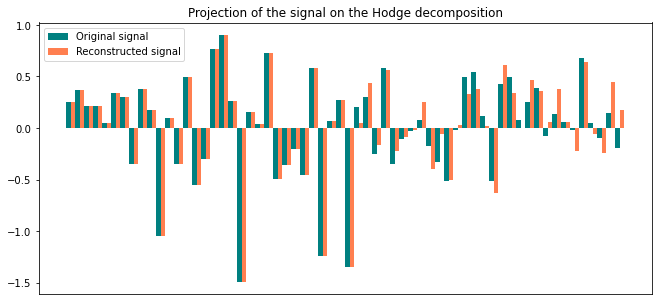

In [89]:
dmtvis.plot_hodge_decomp(X,s1,kX,phispsis,trange=30,type_collapse='up')
plt.savefig('./figures/hodge_new.pdf')

### Randomly collapse 2-cells

In [23]:
all_X_rand,collapses_rand,all_losses_rand,total_loss_rand,all_signals_rand,phispsis_rand= dmt.sequence_optimal_up_collapses(X=X,kX=kX,dimq=1,signal=s1,steps=244,random=True)
colX_rand=all_X_rand[-1]
colS_rand=all_signals_rand[-1]

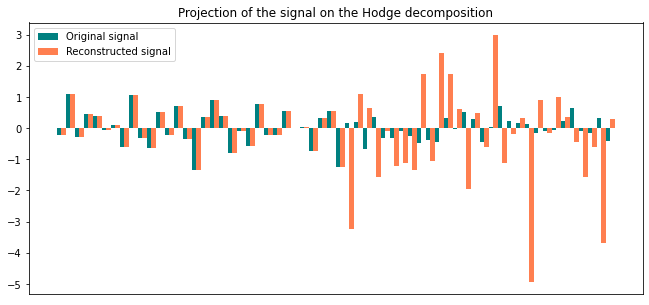

In [25]:
dmtvis.plot_hodge_decomp(X,s1,kX,phispsis_rand,trange=30,type_collapse='up')
plt.savefig('./figures/hodge_multiple_random_collapses_uniform.pdf')

### Comparing losses

In [59]:
def CI_plot_y(data, conf = .95):
    from scipy.stats import sem, t
    n = np.array(data).shape[0]
    std_err = sem(data,axis = 0)
    h = std_err * t.ppf((1 + .95) / 2, n - 1)
    return h

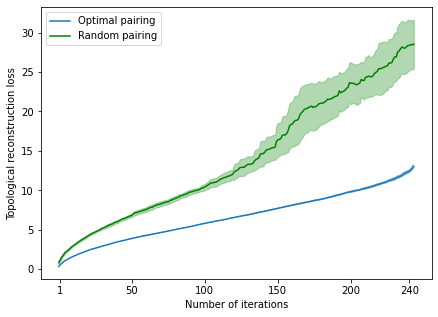

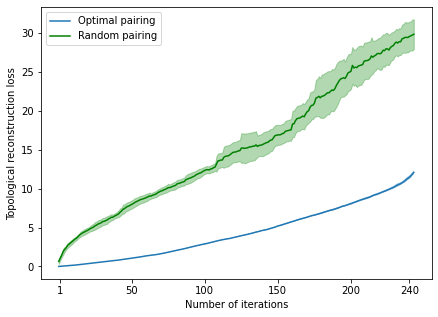

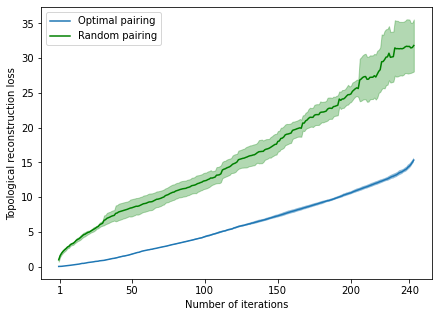

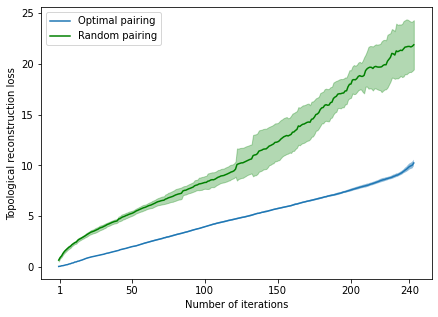

In [90]:
typ=['normal','uniform','height','center']
steps=np.arange(244)
s=[1,50,100,150,200,240]
for j in typ:

    l=np.load('./data/data_optimal_{}_sim0.npy'.format(j))[:,0,:]
    rl=np.load('./data/data_random_{}_sim0.npy'.format(j))[:,0,:]
    #l1=np.load('./data/data_optimal_sim0.npy'.format(j))[:,0,:]
    #rl1=np.load('./data/data_random_sim{0.npy'.format(j))[:,0,:]

    fig = plt.figure(figsize=(7,5))
    m = np.array(l).mean(axis=0)
    h = CI_plot_y(np.array(l))
    plt.plot(steps,m,label="Optimal pairing")
    plt.fill_between(steps,m-h,m+h,alpha=.5,zorder=0)

    m = np.array(rl).mean(axis=0)
    h = CI_plot_y(np.array(rl))
    plt.plot(steps,m,c='green',label="Random pairing")
    plt.fill_between(steps,m-h,m+h,alpha=.3,zorder=0,color='green')
    plt.xticks(s)
    #plt.savefig('./figures/topo_error.pdf')
    plt.xlabel("Number of iterations")
    plt.ylabel("Topological reconstruction loss")
    #plt.title("Signal on the 1-cells: {}".format(j))
    plt.legend(loc='upper left')

    plt.savefig('./figures/topological_loss_{}.pdf'.format(j))

    plt.show()